In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [16]:
df = pd.read_csv('used_bikes.csv')

In [17]:
df

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600,Jaipur,84186.0,First Owner,16.0,125.0,Hero


In [18]:
df.isnull().sum()

bike_name       0
price           0
city            0
kms_driven    281
owner           0
age           163
power         135
brand           0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  int64  
 2   city        32648 non-null  object 
 3   kms_driven  32367 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32485 non-null  float64
 6   power       32513 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 2.0+ MB


# calculating mean of the columns with null values

In [21]:
df['kms_driven'].mean()

26351.961720270647

In [22]:
df['age'].mean()

8.051346775434816

In [23]:
df['power'].mean()

213.44612924061144

In [29]:
a = int(df['age'].mean())
print(a)

8


In [30]:
p = int(df['power'].mean())
print(p)

213


In [31]:
k = int(df['kms_driven'].mean())
print(k)

26351


# replacing null values using calculated mean

In [39]:
df['kms_driven'].fillna(k,inplace=True)

In [40]:
df['age'].fillna(a,inplace=True)

In [41]:
df['power'].fillna(p,inplace=True)

In [42]:
df.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

# EDA

In [47]:
df.shape

(32648, 8)

In [50]:
df.count()

bike_name     32648
price         32648
city          32648
kms_driven    32648
owner         32648
age           32648
power         32648
brand         32648
dtype: int64

In [57]:
df.corr()

,price,kms_driven,age,power
price,1.000000,-0.312391,-0.399974,0.860023
kms_driven,-0.312391,1.000000,0.482461,-0.262889
age,-0.399974,0.482461,1.000000,-0.340008
power,0.860023,-0.262889,-0.340008,1.000000


<AxesSubplot:>

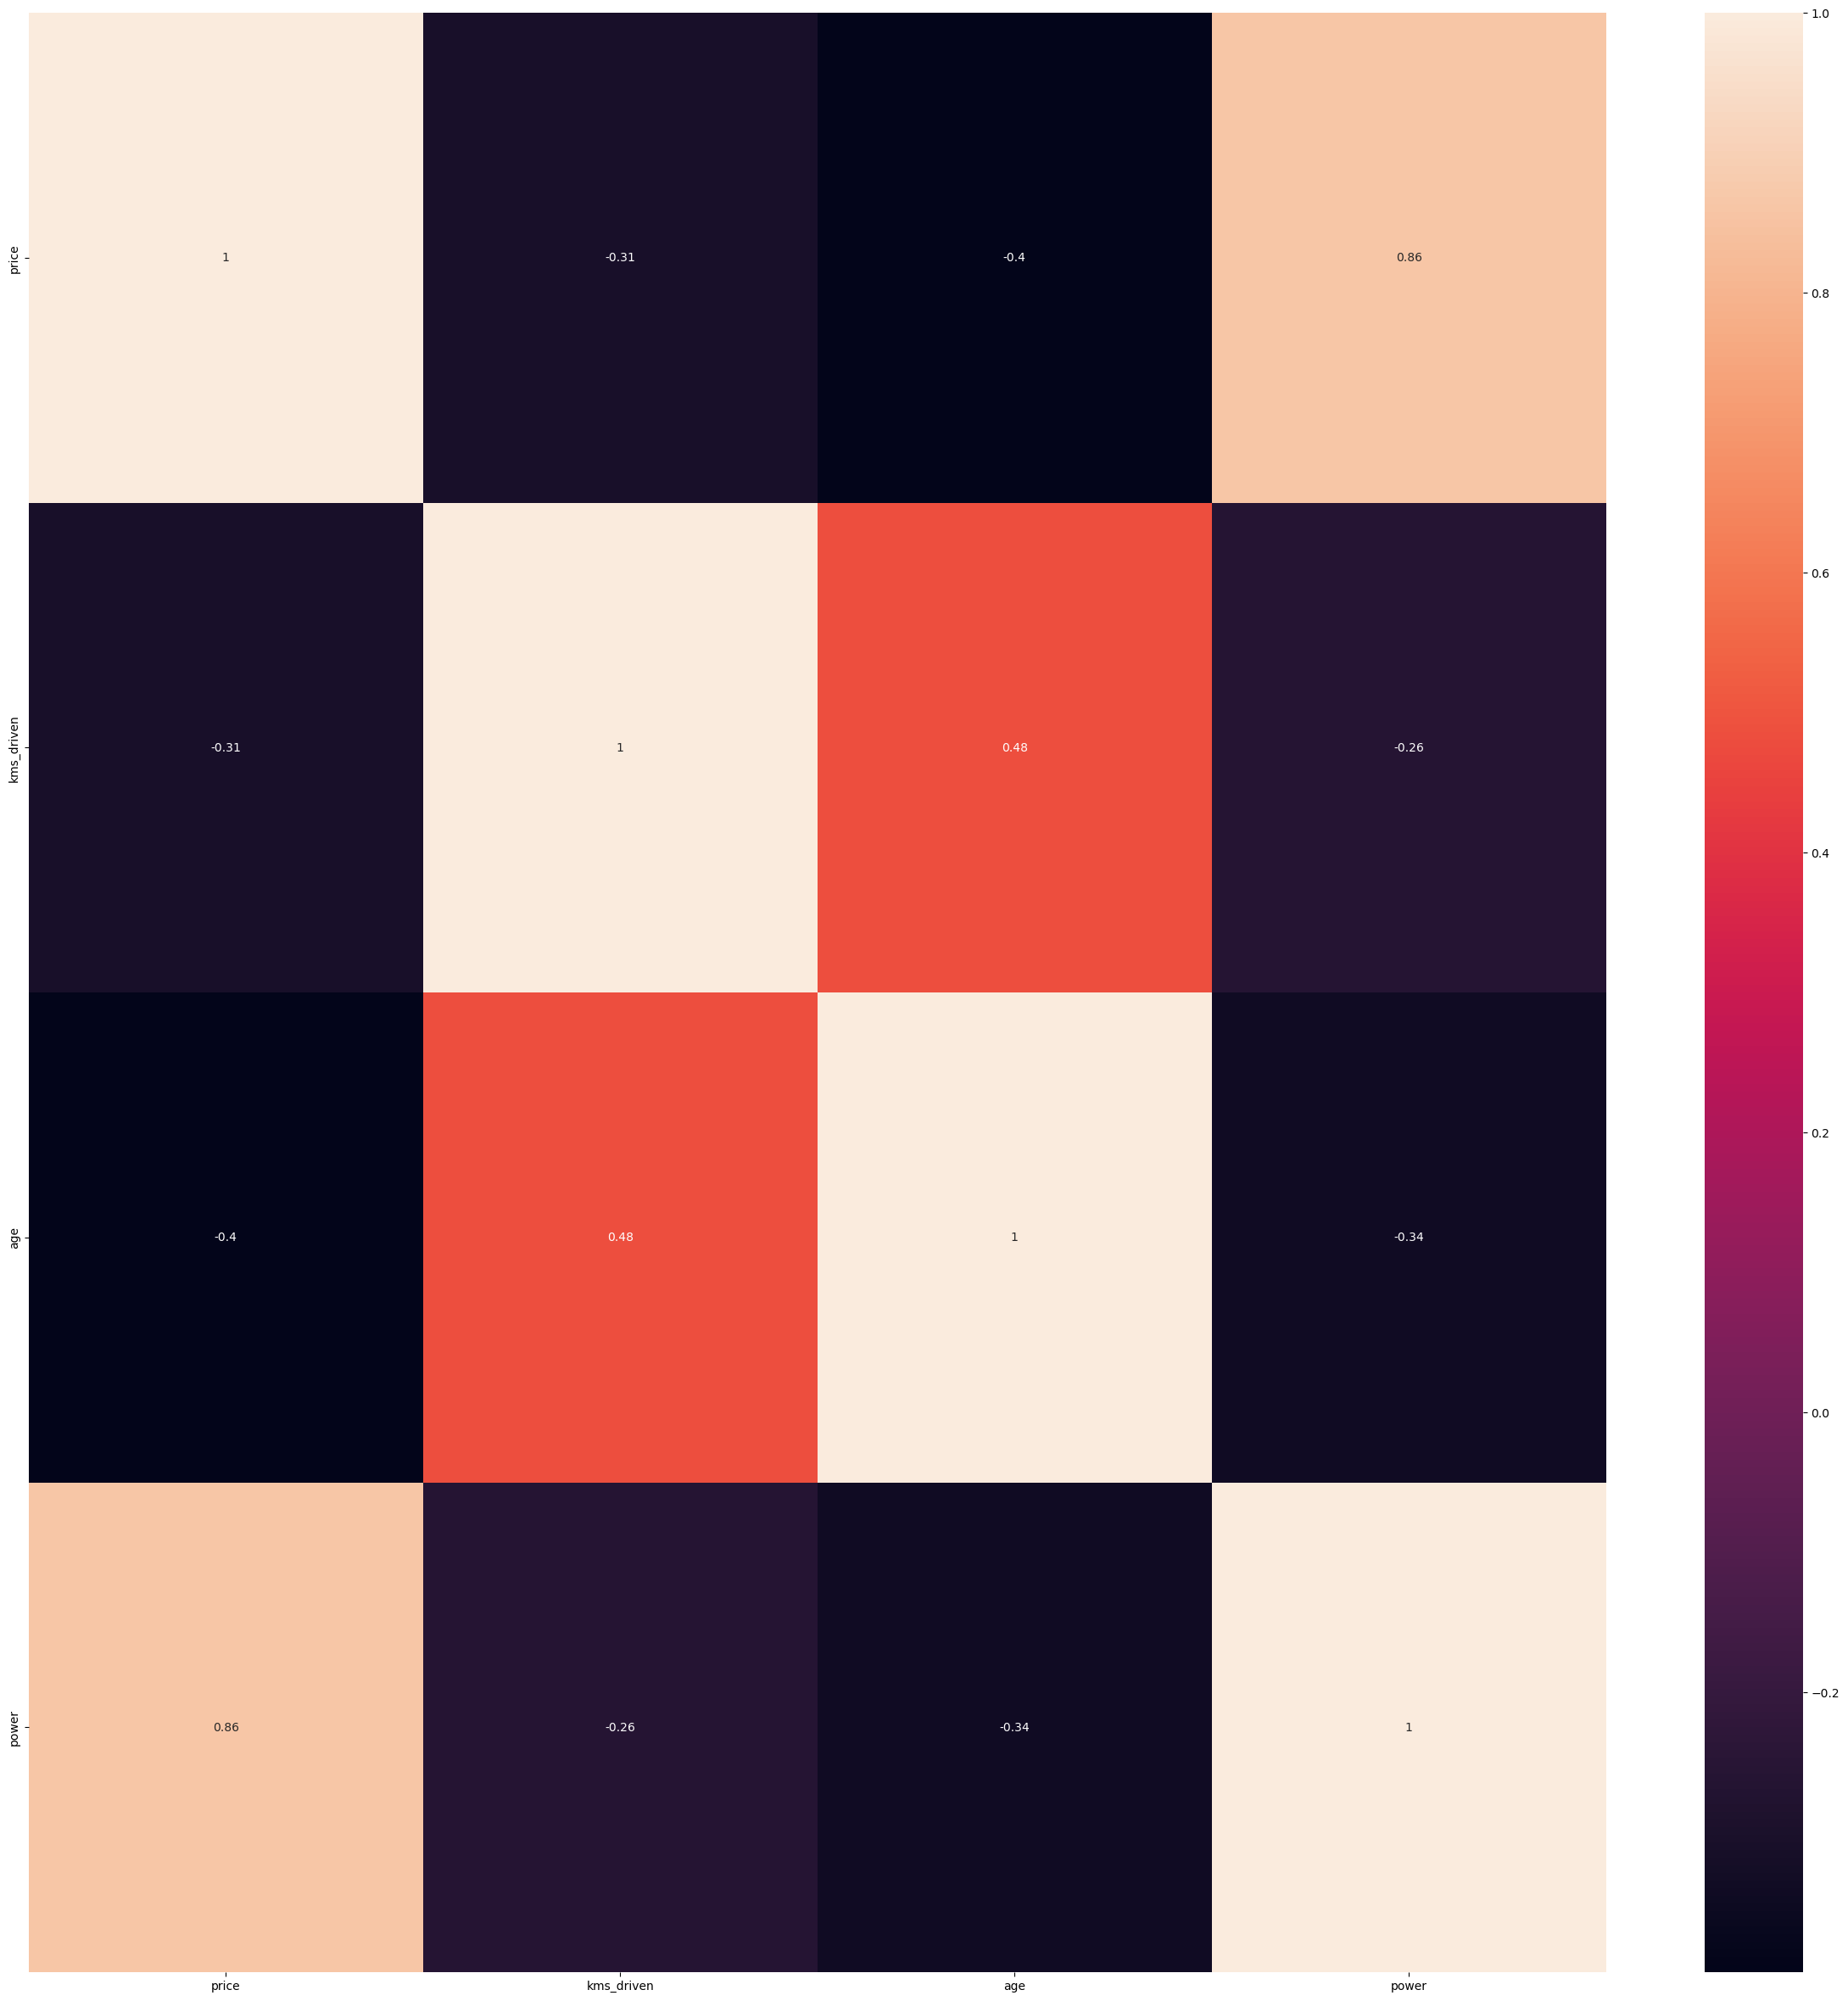

In [58]:
fig = plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

In [91]:
def get_iqr_values(df , column_name):
    median = df[column_name].mean()
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    maximum_quantile = q3 + (1.5*iqr)
    minimum_quantile = q1 - (1.5*iqr)
    return median , q1 , q3 , maximum_quantile , minimum_quantile

def remove_outliers(df,column_name):
    _,_,_,maximum,minimum = get_iqr_values(df,column_name)
    df_out = df[(df[column_name] > minimum) & (df[column_name] < maximum)]
    return df_out

In [93]:
df_out = remove_outliers(df,'price')
number_outliers = df.shape[0] - df_out.shape[0]
print('Number of outliers : ',number_outliers)

Number of outliers :  1941


<AxesSubplot:xlabel='price'>

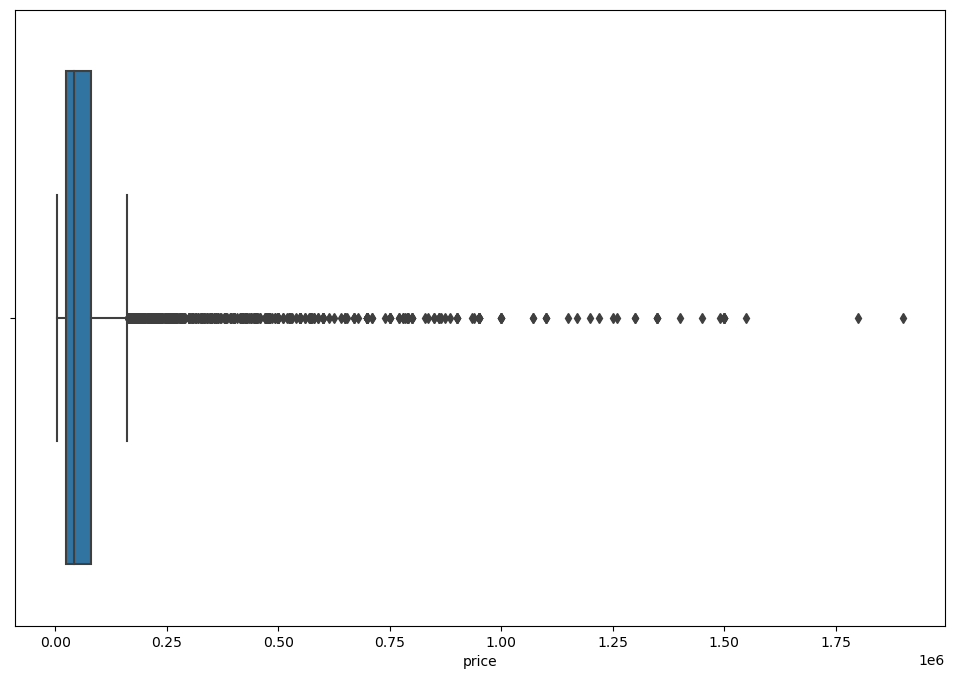

In [59]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'price' , data = df)

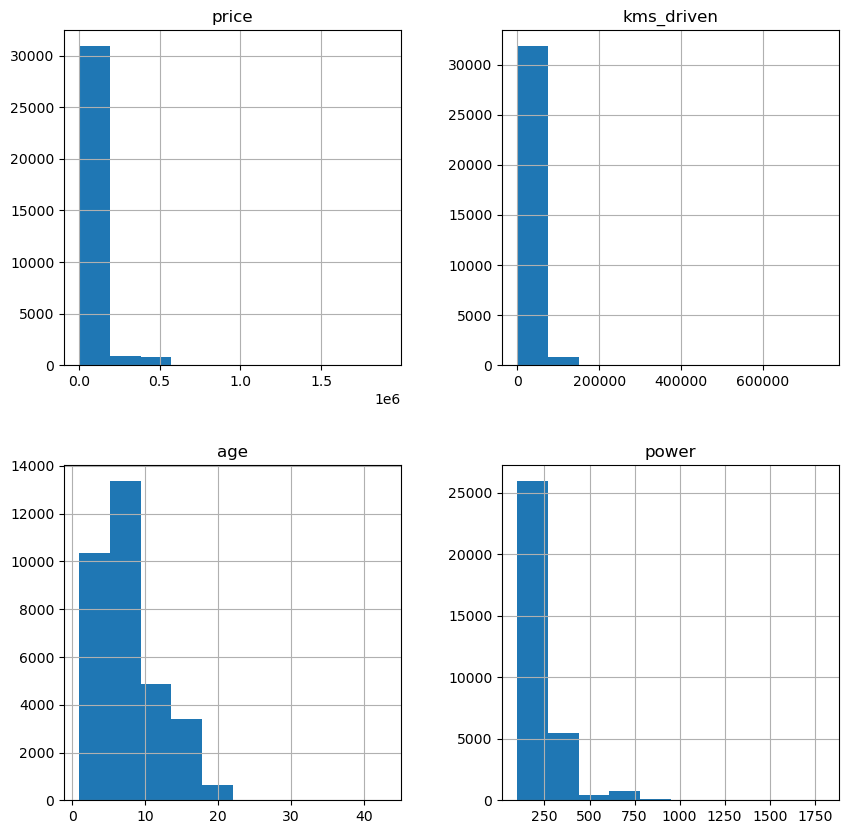

In [60]:
df.hist(figsize=(10,10))
plt.show()

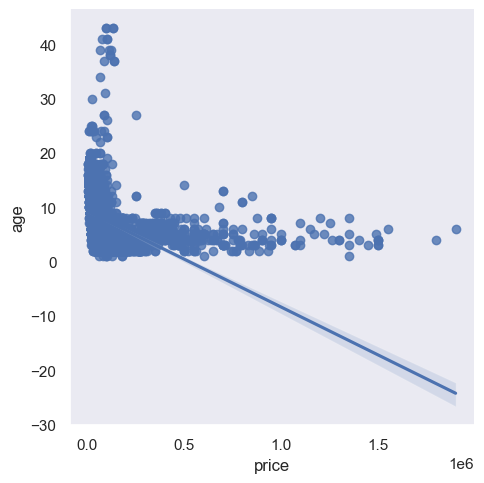

In [82]:
sns.set(style="dark")
graph = df
sns.lmplot(y = "age", x = "price",data=graph)
plt.show()

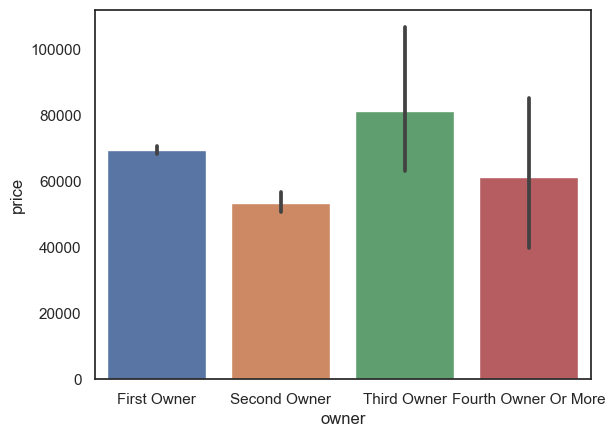

In [85]:
sns.set(style='white')
graph=df
sns.barplot (x = 'owner', y = 'price', data = graph)
plt.show()

<AxesSubplot:xlabel='price', ylabel='Count'>

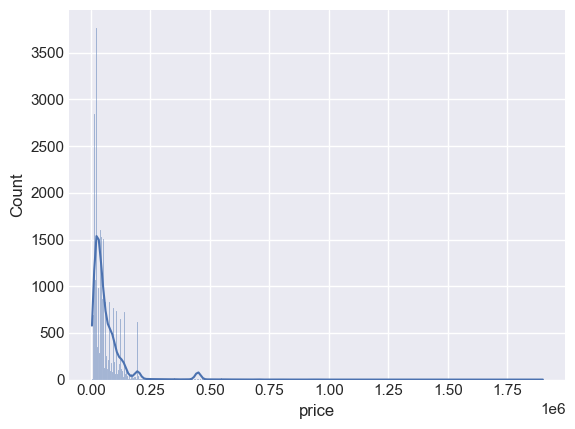

In [100]:
sns.histplot(data = df['price'], kde = True)

<AxesSubplot:xlabel='price', ylabel='Count'>

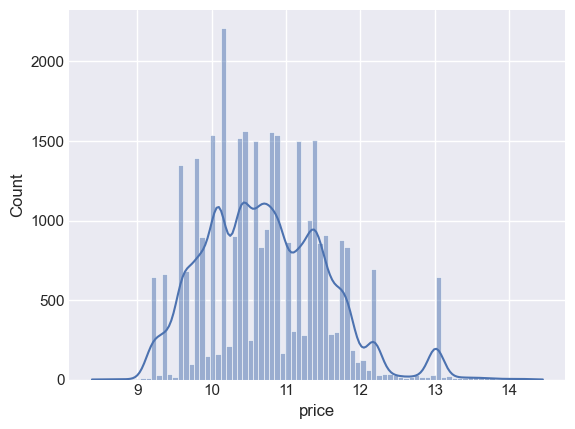

In [101]:
sns.histplot(np.log(df['price']), kde = True)

(5.0, 50.0)

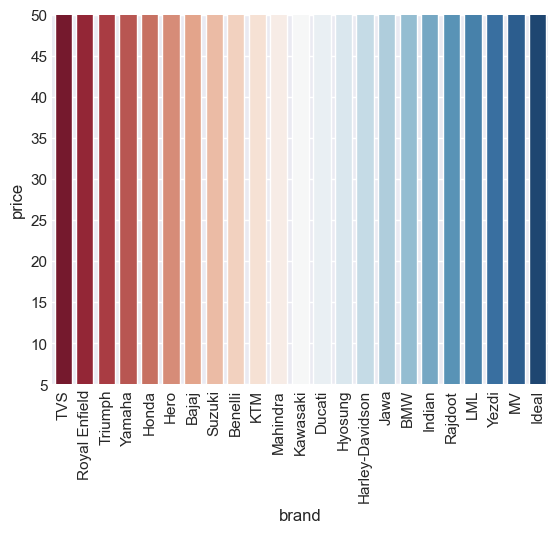

In [102]:
g = sns.barplot(x=df['brand'],y=df['price'],palette='RdBu')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylim(5, 50)

[Text(0, 0, '1.0'),
 Text(1, 0, '2.0'),
 Text(2, 0, '3.0'),
 Text(3, 0, '4.0'),
 Text(4, 0, '5.0'),
 Text(5, 0, '6.0'),
 Text(6, 0, '7.0'),
 Text(7, 0, '8.0'),
 Text(8, 0, '9.0'),
 Text(9, 0, '10.0'),
 Text(10, 0, '11.0'),
 Text(11, 0, '12.0'),
 Text(12, 0, '13.0'),
 Text(13, 0, '14.0'),
 Text(14, 0, '15.0'),
 Text(15, 0, '16.0'),
 Text(16, 0, '17.0'),
 Text(17, 0, '18.0'),
 Text(18, 0, '19.0'),
 Text(19, 0, '20.0'),
 Text(20, 0, '22.0'),
 Text(21, 0, '23.0'),
 Text(22, 0, '24.0'),
 Text(23, 0, '25.0'),
 Text(24, 0, '26.0'),
 Text(25, 0, '27.0'),
 Text(26, 0, '30.0'),
 Text(27, 0, '31.0'),
 Text(28, 0, '34.0'),
 Text(29, 0, '37.0'),
 Text(30, 0, '38.0'),
 Text(31, 0, '39.0'),
 Text(32, 0, '41.0'),
 Text(33, 0, '43.0')]

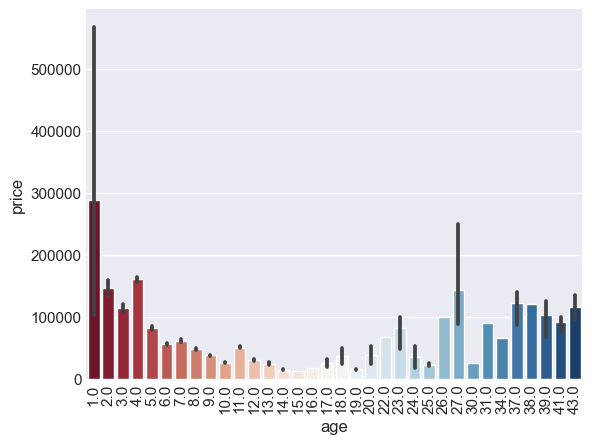

In [103]:
g = sns.barplot(x=df['age'],y=df['price'],palette='RdBu')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

[Text(0, 0, 'TVS'),
 Text(1, 0, 'Royal Enfield'),
 Text(2, 0, 'Triumph'),
 Text(3, 0, 'Yamaha'),
 Text(4, 0, 'Honda'),
 Text(5, 0, 'Hero'),
 Text(6, 0, 'Bajaj'),
 Text(7, 0, 'Suzuki'),
 Text(8, 0, 'Benelli'),
 Text(9, 0, 'KTM'),
 Text(10, 0, 'Mahindra'),
 Text(11, 0, 'Kawasaki'),
 Text(12, 0, 'Ducati'),
 Text(13, 0, 'Hyosung'),
 Text(14, 0, 'Harley-Davidson'),
 Text(15, 0, 'Jawa'),
 Text(16, 0, 'BMW'),
 Text(17, 0, 'Indian'),
 Text(18, 0, 'Rajdoot'),
 Text(19, 0, 'LML'),
 Text(20, 0, 'Yezdi'),
 Text(21, 0, 'MV'),
 Text(22, 0, 'Ideal')]

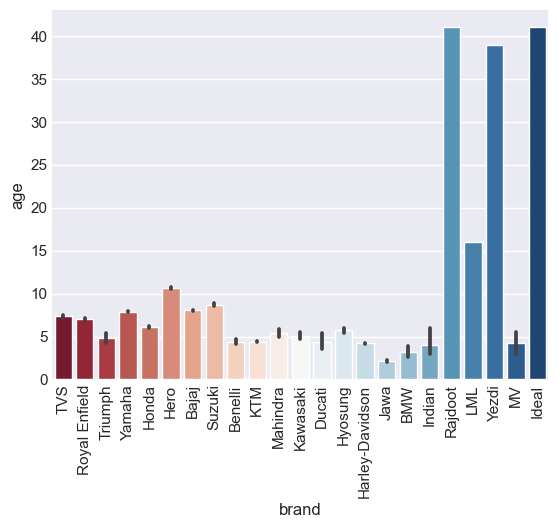

In [104]:
g = sns.barplot(x=df['brand'],y=df['age'],palette='RdBu')
g.set_xticklabels(g.get_xticklabels(), rotation=90)